In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
# df1 = pd.read_csv('binclass.txt', header=None, names=['feature1','feature2','class'])
df1 = pd.read_csv('binclass.txt', header=None)
df2 = pd.read_csv('binclassv2.txt', header=None)

In [3]:
df1.columns = ['Feature_1', 'Feature_2','Class']
df2.columns = ['Feature_1', 'Feature_2','Class']

### Plotting the dataset from files 'binclass.txt' and 'binclassv_2.txt'

Text(0.5,1,'Filename-binclass.txt')

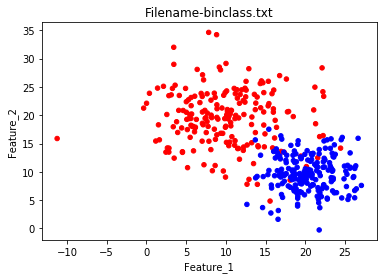

In [4]:
df1.plot.scatter('Feature_1', 'Feature_2', c=df1['Class'].apply(lambda x: 'red' if x is 1 else 'blue'))
plt.title('Filename-binclass.txt')

Text(0.5,1,'Filename-binclassv2.txt')

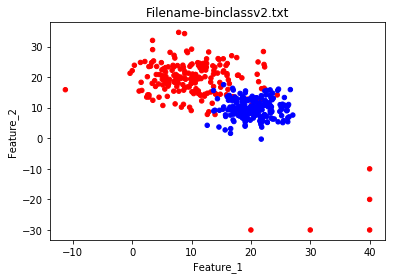

In [5]:
df2.plot.scatter('Feature_1', 'Feature_2', c=df1['Class'].apply(lambda x: 'red' if x is 1 else 'blue'))
plt.title('Filename-binclassv2.txt')

In [6]:
# Functions
# ---------
# Finding mean of the both classes
def mean(elements):
    return sum(elements)/float(len(elements))

# Finding standard Deviation of both classes
def variance(elements):
    mu = mean(elements)
    variance = sum([pow(x-mu,2) for x in elements])/float(len(elements))
    return variance

# Finding the summary of the dataset (mean and variance)
def summarize(dataset):
    summaries = [(mean(attribute), variance(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries 

In [7]:
#Creating Summary of attribute parameters(mean and variance) for the file 'binclass.txt'
dataset = []
for i in range(400):
    dataset.append(list(df1.loc[i]))
# Summary of positive class examples
d1 = summarize(dataset[:200])
# Summary of negetive class examples
d2 = summarize(dataset[200:])

# Mean of positive examples
file1_d1_mu = (d1[0][0], d1[1][0])
# Variance of positive examples
file1_d1_variance = (d1[0][1]+d1[1][1])/2
print("For Positive class, Mean =",file1_d1_mu,"and Variance=",file1_d1_variance)

# Mean of Negative examples
file1_d2_mu = (d2[0][0], d2[1][0])
# Variance of negetive examples
file1_d2_variance = (d2[0][1]+d2[1][1])/2
print("For Negetive class, Mean =",file1_d2_mu,"and Variance=",file1_d2_variance)

# Variance of both the classes
print("Variance of both classes=", (file1_d1_variance+file1_d2_variance)/2)

For Positive class, Mean = (10.011457635000005, 19.549524499999993) and Variance= 26.60589653084015
For Negetive class, Mean = (20.324890000000003, 9.687995749999999) and Variance= 9.500608154947216
Variance of both classes= 18.053252342893682


In [8]:
#Creating Summary of attribute parameters(mean and variance) for the file 'binclassv2.txt'
dataset = []
for i in range(400):
    dataset.append(list(df2.loc[i]))
# Summary of positive class examples
d1 = summarize(dataset[:200])
# Summary of negetive class examples
d2 = summarize(dataset[200:])

# Mean of positive examples
file2_d1_mu = (d1[0][0], d1[1][0])
# Variance of positive examples
file2_d1_variance = (d1[0][1]+d1[1][1])/2
print("For Positive class, Mean =",file2_d1_mu,"and Variance=",file2_d1_variance)

# Mean of Negative examples
file2_d2_mu = (d2[0][0], d2[1][0])
# Variance of negetive examples
file2_d2_variance = (d2[0][1]+d2[1][1])/2
print("For Negetive class, Mean =",file2_d2_mu,"and Variance=",file2_d2_variance)

# Variance of both the classes
print("Variance of both classes=", (file2_d1_variance+file2_d2_variance)/2)

For Positive class, Mean = (10.574983635000002, 18.55690049999999) and Variance= 57.385938806281125
For Negetive class, Mean = (20.324890000000003, 9.687995749999999) and Variance= 9.500608154947216
Variance of both classes= 33.44327348061417


### Plotting decision boundary using generative classification

In [9]:
# Function to learn the decision boundary
def decision_boundary(*args):
    boundary = []
    for d in args[0]:
        p = (d - args[1]).reshape((2, 1))
        n = (d - args[2]).reshape((2, 1))
        p_vote = np.matmul(p.T, p)/args[3] # For positive class
        n_vote = np.matmul(n.T, n)/args[4] # For negetive class
        boundary.append(p_vote - n_vote)
    return np.array(boundary)

Text(0.5,1,'Filename-binclass.txt')

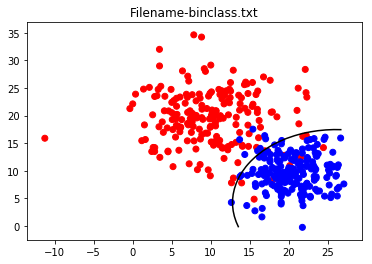

In [10]:
f1 = np.array(df1['Feature_1']) # Feature 1 of File 'binclass.txt'
f2 = np.array(df1['Feature_2']) # Feature 2 of File 'binclass.txt'

x_min, x_max = f1.min(), f1.max()
y_min, y_max = f2.min(), f2.max()
xv, yv = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
b = decision_boundary(np.c_[xv.ravel(), yv.ravel()],file1_d1_mu,file1_d2_mu, file1_d1_variance, file1_d2_variance) 
b = b.reshape(xv.shape)
plt.contour(xv, yv, b, [0], colors='black')
plt.scatter(f1, f2, c=df1['Class'].apply(lambda x: 'red' if x is 1 else 'blue'))
plt.title('Filename-binclass.txt')


Text(0.5,1,'Filename-binclassv2.txt')

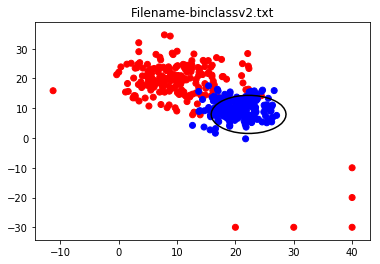

In [11]:
f1 = np.array(df2['Feature_1']) # Feature 1 of File 'binclassv2.txt'
f2 = np.array(df2['Feature_2']) # Feature 2 of File 'binclassv2.txt'

x_min, x_max = f1.min(), f1.max()
y_min, y_max = f2.min(), f2.max()
xv, yv = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
b = decision_boundary(np.c_[xv.ravel(), yv.ravel()],file2_d1_mu,file2_d2_mu, file2_d1_variance, file2_d2_variance) 
b = b.reshape(xv.shape)
plt.contour(xv, yv, b, [0], colors='black')
plt.scatter(f1, f2, c=df2['Class'].apply(lambda x: 'red' if x is 1 else 'blue'))
plt.title('Filename-binclassv2.txt')

In [12]:
# Function to learn the decision boundary with same variance
def decision_boundary_samevariance(*args):
    boundary = []
    for d in args[0]:
        p = (d - args[1]).reshape((2, 1))
        n = (d - args[2]).reshape((2, 1))
        p_vote = np.matmul(p.T, p) # For positive class
        n_vote = np.matmul(n.T, n) # For negetive class
        boundary.append(p_vote - n_vote)
    return np.array(boundary)

Text(0.5,1,'Filename-binclass.txt')

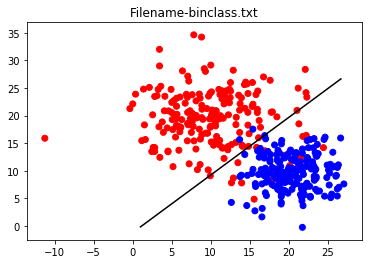

In [13]:
f1 = np.array(df1['Feature_1']) # Feature 1 of File 'binclass.txt'
f2 = np.array(df1['Feature_2']) # Feature 2 of File 'binclass.txt'

x_min, x_max = f1.min(), f1.max()
y_min, y_max = f2.min(), f2.max()
xv, yv = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
b = decision_boundary_samevariance(np.c_[xv.ravel(), yv.ravel()],file1_d1_mu,file1_d2_mu) 
b = b.reshape(xv.shape)
plt.contour(xv, yv, b, [0], colors='black')
plt.scatter(f1, f2, c=df1['Class'].apply(lambda x: 'red' if x is 1 else 'blue'))
plt.title('Filename-binclass.txt')


Text(0.5,1,'Filename-binclassv2.txt')

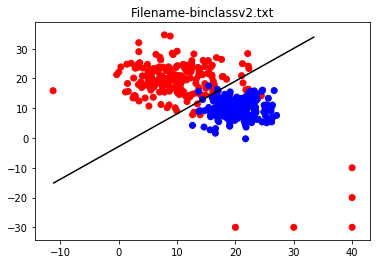

In [14]:
f1 = np.array(df2['Feature_1']) # Feature 1 of File 'binclassv2.txt'
f2 = np.array(df2['Feature_2']) # Feature 2 of File 'binclassv2.txt'

x_min, x_max = f1.min(), f1.max()
y_min, y_max = f2.min(), f2.max()
xv, yv = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
b = decision_boundary_samevariance(np.c_[xv.ravel(), yv.ravel()],file2_d1_mu,file2_d2_mu)
b = b.reshape(xv.shape)
plt.contour(xv, yv, b, [0], colors='black')
plt.scatter(f1, f2, c=df2['Class'].apply(lambda x: 'red' if x is 1 else 'blue'))
plt.title('Filename-binclassv2.txt')

### SVM 


In [15]:
df1.head()

,Feature_1,Feature_2,Class
0,4.5316,13.5610,1
1,8.1112,13.9300,1
2,15.5630,4.8348,1
3,14.7630,20.5850,1
4,14.3260,25.6140,1


In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC  
def svm(*args):
    X = args[0]
    y = args[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  
    svclassifier = SVC(kernel='linear')  # Linear kernel SVM
    svclassifier.fit(X_train, y_train)
    return svclassifier

In [17]:
# svclassifier = svm(df1.drop('Class', axis=1), df1['Class'])

In [27]:
def svm_plotter(*args):
    plt.scatter(args[0], args[1], c=np.vectorize(lambda x: 'red' if x is 1 else 'blue')(args[2]), s=30)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = args[3].decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(args[3].support_vectors_[:, 0], args[3].support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none')

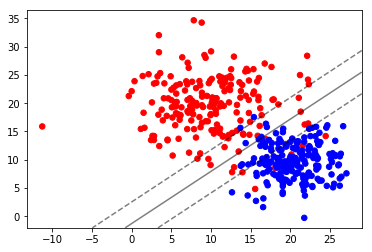

In [28]:
svm_plotter(df1['Feature_1'],df1['Feature_2'], df1['Class'], svm(df1.drop('Class', axis=1), df1['Class']) )

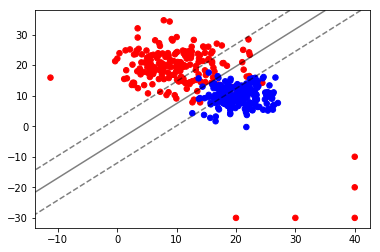

In [29]:
svm_plotter(df2['Feature_1'],df2['Feature_2'], df2['Class'], svm(df2.drop('Class', axis=1), df1['Class']) )

In [ ]:
print("Hello World")